<a href="https://colab.research.google.com/github/uri-rizo2/Linear-Logistic-Regression-w-Datasets/blob/main/Linear_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Uriel Amezcua

10/03/21

CSCI 191t





##**Linear and Logistic Regression**

 In this assignment I have implemented both Linear and Logistic Regression with the squared error derived gradient. The datasets i have inlcuded were the datasets used in the previous logistic regression assignment and the Iris dataset imported as a raw file from github. 

 update: i unfortunately did not implement the iris dataset. I was able to upload the dataset but i had issues implementing it into the linear and logistic functions. 

In [1]:
### Includes
%matplotlib inline
import matplotlib.pyplot as plt
import math as math
import numpy as np
import pandas as pd
import requests
import io
    

## Datasets

In [2]:
data1 = [((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]
data2 = [((1, 0, 0), 0), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 0), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 1), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]
data3 = [((1, 2, 7), 0), ((1, 19, 72), 0), ((1, -39, -20), 0), ((1, 86, 95), 1), ((1, 45, 37), 1), ((1, 52, -23), 1), ((1, -8, -8), 0), ((1, 67, 93), 1), ((1, 46, 21), 1), ((1, 18, -97), 1), ((1, -78, 70), 0), ((1, -9, -17), 1), ((1, 94, -40), 1), ((1, 11, -3), 1), ((1, -24, -59), 1), ((1, 25, 33), 1), ((1, -71, 23), 0), ((1, -34, -7), 0), ((1, 55, -3), 1), ((1, -5, -33), 1), ((1, -22, 38), 0), ((1, 94, 66), 1), ((1, 4, -89), 1), ((1, -9, 26), 0), ((1, -83, 61), 0), ((1, 19, 98), 0), ((1, -1, 55), 0), ((1, -43, 90), 0), ((1, 86, 27), 1), ((1, 24, 69), 0)]
data4 = [((1, 5.1, 3.5), 0), ((1, 4.9, 3.0), 0), ((1, 4.7, 3.2), 0), ((1, 4.6, 3.1), 0), ((1, 5.0, 3.6), 0), ((1, 5.4, 3.9), 0), ((1, 4.6, 3.4), 0), ((1, 5.0, 3.4), 0), ((1, 4.4, 2.9), 0), ((1, 4.9, 3.1), 0), ((1, 5.4, 3.7), 0), ((1, 4.8, 3.4), 0), ((1, 4.8, 3.0), 0), ((1, 4.3, 3.0), 0), ((1, 5.8, 4.0), 0), ((1, 5.7, 4.4), 0), ((1, 5.4, 3.9), 0), ((1, 5.1, 3.5), 0), ((1, 5.7, 3.8), 0), ((1, 5.1, 3.8), 0), ((1, 5.4, 3.4), 0), ((1, 5.1, 3.7), 0), ((1, 4.6, 3.6), 0), ((1, 5.1, 3.3), 0), ((1, 4.8, 3.4), 0), ((1, 5.0, 3.0), 0), ((1, 5.0, 3.4), 0), ((1, 5.2, 3.5), 0), ((1, 5.2, 3.4), 0), ((1, 4.7, 3.2), 0), ((1, 4.8, 3.1), 0), ((1, 5.4, 3.4), 0), ((1, 5.2, 4.1), 0), ((1, 5.5, 4.2), 0), ((1, 4.9, 3.1), 0), ((1, 5.0, 3.2), 0), ((1, 5.5, 3.5), 0), ((1, 4.9, 3.6), 0), ((1, 4.4, 3.0), 0), ((1, 5.1, 3.4), 0), ((1, 5.0, 3.5), 0), ((1, 4.5, 2.3), 0), ((1, 4.4, 3.2), 0), ((1, 5.0, 3.5), 0), ((1, 5.1, 3.8), 0), ((1, 4.8, 3.0), 0), ((1, 5.1, 3.8), 0), ((1, 4.6, 3.2), 0), ((1, 5.3, 3.7), 0), ((1, 5.0, 3.3), 0), ((1, 7.0, 3.2), 1), ((1, 6.4, 3.2), 1), ((1, 6.9, 3.1), 1), ((1, 5.5, 2.3), 1), ((1, 6.5, 2.8), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 1), ((1, 4.9, 2.4), 1), ((1, 6.6, 2.9), 1), ((1, 5.2, 2.7), 1), ((1, 5.0, 2.0), 1), ((1, 5.9, 3.0), 1), ((1, 6.0, 2.2), 1), ((1, 6.1, 2.9), 1), ((1, 5.6, 2.9), 1), ((1, 6.7, 3.1), 1), ((1, 5.6, 3.0), 1), ((1, 5.8, 2.7), 1), ((1, 6.2, 2.2), 1), ((1, 5.6, 2.5), 1), ((1, 5.9, 3.2), 1), ((1, 6.1, 2.8), 1), ((1, 6.3, 2.5), 1), ((1, 6.1, 2.8), 1), ((1, 6.4, 2.9), 1), ((1, 6.6, 3.0), 1), ((1, 6.8, 2.8), 1), ((1, 6.7, 3.0), 1), ((1, 6.0, 2.9), 1), ((1, 5.7, 2.6), 1), ((1, 5.5, 2.4), 1), ((1, 5.5, 2.4), 1), ((1, 5.8, 2.7), 1), ((1, 6.0, 2.7), 1), ((1, 5.4, 3.0), 1), ((1, 6.0, 3.4), 1), ((1, 6.7, 3.1), 1), ((1, 6.3, 2.3), 1), ((1, 5.6, 3.0), 1), ((1, 5.5, 2.5), 1), ((1, 5.5, 2.6), 1), ((1, 6.1, 3.0), 1), ((1, 5.8, 2.6), 1), ((1, 5.0, 2.3), 1), ((1, 5.6, 2.7), 1), ((1, 5.7, 3.0), 1), ((1, 5.7, 2.9), 1), ((1, 6.2, 2.9), 1), ((1, 5.1, 2.5), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 2), ((1, 5.8, 2.7), 2), ((1, 7.1, 3.0), 2), ((1, 6.3, 2.9), 2), ((1, 6.5, 3.0), 2), ((1, 7.6, 3.0), 2), ((1, 4.9, 2.5), 2), ((1, 7.3, 2.9), 2), ((1, 6.7, 2.5), 2), ((1, 7.2, 3.6), 2), ((1, 6.5, 3.2), 2), ((1, 6.4, 2.7), 2), ((1, 6.8, 3.0), 2), ((1, 5.7, 2.5), 2), ((1, 5.8, 2.8), 2), ((1, 6.4, 3.2), 2), ((1, 6.5, 3.0), 2), ((1, 7.7, 3.8), 2), ((1, 7.7, 2.6), 2), ((1, 6.0, 2.2), 2), ((1, 6.9, 3.2), 2), ((1, 5.6, 2.8), 2), ((1, 7.7, 2.8), 2), ((1, 6.3, 2.7), 2), ((1, 6.7, 3.3), 2), ((1, 7.2, 3.2), 2), ((1, 6.2, 2.8), 2), ((1, 6.1, 3.0), 2), ((1, 6.4, 2.8), 2), ((1, 7.2, 3.0), 2), ((1, 7.4, 2.8), 2), ((1, 7.9, 3.8), 2), ((1, 6.4, 2.8), 2), ((1, 6.3, 2.8), 2), ((1, 6.1, 2.6), 2), ((1, 7.7, 3.0), 2), ((1, 6.3, 3.4), 2), ((1, 6.4, 3.1), 2), ((1, 6.0, 3.0), 2), ((1, 6.9, 3.1), 2), ((1, 6.7, 3.1), 2), ((1, 6.9, 3.1), 2), ((1, 5.8, 2.7), 2), ((1, 6.8, 3.2), 2), ((1, 6.7, 3.3), 2), ((1, 6.7, 3.0), 2), ((1, 6.3, 2.5), 2), ((1, 6.5, 3.0), 2), ((1, 6.2, 3.4), 2), ((1, 5.9, 3.0), 2)]

#imported iris dataset as data5 
url = "https://raw.githubusercontent.com/uri-rizo2/Linear-Logistic-Regression-w-Datasets/main/iris" 
Irisdownload = requests.get(url).content
data5 = pd.read_csv(io.StringIO(Irisdownload.decode('utf-8')))



## **Linear Regression** 

Linear regression analysis is used to predict the value of a variable based on the value of another variable. 

In [10]:

Weights = [-9, 4]
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

dataX1 = range(-4, 9, 1)
dataX0 = [1]*len(dataX1)

data = list(zip(dataX0, dataX1))

Y = [F(Weights, X) for X in data]


In [11]:
# training data to test linear regression 
TrainingData1 = [((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
TrainingData2 = [((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]
data = TrainingData1

X = [(d[0], d[1]) for d,_ in data]
Y = [y for _, y in data]
# if error is going up change the alpha
alpha=0.0001
model=[0, 0, 0, 0]
iteration = 0
EData = []
AD = []

yPredicted = [F(model, x) for x in X]
Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
AD.append(sum([(r-y) for r,y in zip(Y, yPredicted)])/len(Y))

Iteration:  50 Error= 1662.4617775729944
[0.11516511757818833, 0.6907975075563718]


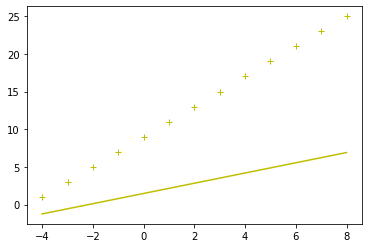

In [12]:
for _ in range(50):
  yPredicted = [F(model, x) for x in X]

  Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
  AD.append(sum([(r-y) for r,y in zip(Y, yPredicted)])/len(Y))
  YypX = list(zip(Y, yPredicted, X))

  deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*x[0]) for r,y,x in YypX] )
  deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*x[1]) for r,y,x in YypX] )
  model = [model[0]-alpha*deltaX0, model[1]-alpha*deltaX1]
  
  iteration += 1
  EData.append([Error,iteration])

print("Iteration: ", iteration, "Error=", Error)
print(model)
plt.plot(dataX1, yPredicted, "y")
plt.plot(dataX1, Y, "y+")
plt.show()


Graph of Error / iteration


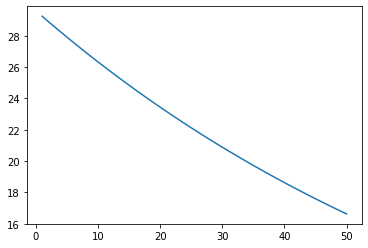

In [13]:


print("Graph of Error / iteration")

plt.plot([x for _,x in EData], [y/100 for y,_ in EData])
plt.show()



### **Logistic Regression**
Logistic Regression is an algorithm used for classification problems, it is a predictive analysis algorithm and based on the concept of probability.

 **Perceptron**

The perceptron is achieved by calculating the weighted sum of the inputs and a bias. Examples from the training dataset (data 1,2,3,4) are shown to the model one at a time, the model makes a prediction, and an error is calculated. The weights of the model are then updated to reduce the errors for the example. This is the Perceptron's update rule.


In [ ]:
Weights = [.001, .001, .001]
F = lambda W, X: sum([w*x for w,x in zip(W,X)])
g = lambda y :1/(1+ np.exp(math.e*-y)) #sigmoid 
def k(x):
    if (x>.5):
      return(1)
    else:
      return (0)

dataX1 = [x[1] for x,_ in data1]
dataX0 = [1]*len(dataX1)
data = list(zip(dataX0, dataX1))
Y = [F(Weights, X) for X in data]

### Sigmoid

The sigmoid function is the more complex cost function similar to the one used on the linear regression problem. The function maps any real value into another value between 0 and 1.

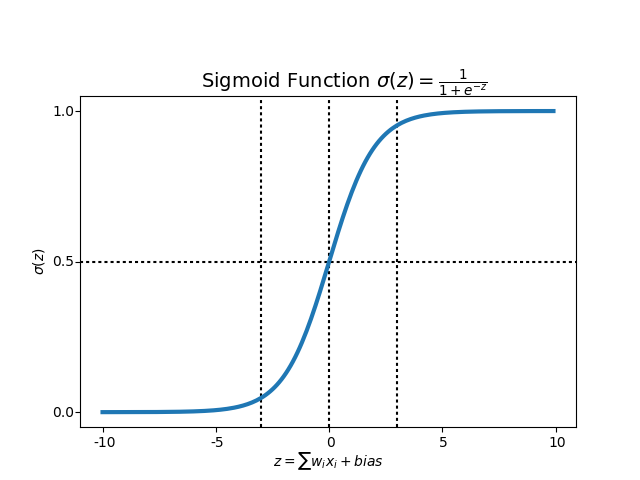

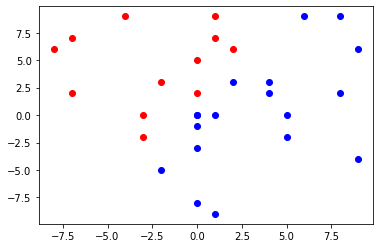

In [ ]:
a = [(d[1]) for d,_ in (x for x in data1 if ((x[1])==0))]
b = [(y[2]) for y,_ in (x for x in data1 if ((x[1])==0))]
plt.plot(a, b,"ro")

a2 = [(d[1]) for d,_ in (x for x in data1 if ((x[1])==1))]
b2 = [(y[2]) for y,_ in (x for x in data1 if ((x[1])==1))]
plt.plot(a2, b2,"bo")


In [ ]:
TrainingData = data1  # <-- you can change dataset data1 here with "data(1-5)"
#print (TrainingData)
X = [d for d,_ in TrainingData]
Y = [(d[2]) for d,_ in TrainingData]
Alpha = .000001    
model = [0.0001, 0.0001, 0.0001]
conc = [x for _,x in TrainingData]

iteration = 0
Pred = [g(F(model, x)) for x,_ in TrainingData]

deltaX0s = []
deltaX1s = []
deltaX2s = []

[((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]


In [ ]:
for _ in range(500):


  YypX = list(zip(conc, Pred, X))

  deltaX0 = -2*sum( [(r-y)*y*(1-y)*x[0] for r,y,x in YypX] )
  deltaX1 = -2*sum( [(r-y)*y*(1-y)*x[1] for r,y,x in YypX] )
  deltaX2 = -2*sum( [(r-y)*y*(1-y)*x[2] for r,y,x in YypX] )

#print (Pred)

In [ ]:
  model = [model[0]-(Alpha*deltaX0), model[1]-(Alpha*deltaX1), model[2]-(Alpha*deltaX2)]
  iteration += 1
  
  deltaX0s.append([deltaX0, iteration])
  deltaX1s.append([deltaX1, iteration])
  deltaX2s.append([deltaX2, iteration])

#print("Iteration: ", iteration)
#print(model)

[-1.1670390374375847, -1.4082715222997297]


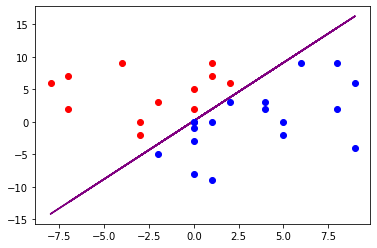

In [ ]:

L = [-model[0]/model[2],-model[1]/model[2]] 
print (L)
LY = [(F(Line, [x[0],x[1]])) for x,_ in TrainingData]
plt.plot([x[1] for x in  X], LY, "purple")
a = [(d[1]) for d,_ in (x for x in TrainingData if ((x[1])==0))]
b = [(y[2]) for y,_ in (x for x in TrainingData if ((x[1])==0))]
plt.plot(a, b,"ro")
a2 = [(d[1]) for d,_ in (x for x in TrainingData if ((x[1])==1))]
b2 = [(y[2]) for y,_ in (x for x in TrainingData if ((x[1])==1))]
plt.plot(a2, b2,"bo")
plt.show()

### Logistic Regression results (Binary classification) 

In [ ]:
w=[round(c,2) for c in log_reg.coef_[0]]
print(w)

for x,y in zip(X, Y):
  print ("x,r,y=", x, y, g(F(w,x)), round(g(F(w,x)), 3), classify(g(F(w,x))))

[4.15, 6.35, -3.97]
x,r,y= (1, 0, 0) 0 0.999987388257076 1.0 1
x,r,y= (1, 1, 7) 7 3.877513659485279e-21 0.0 0
x,r,y= (1, -3, -2) -2 6.0740421426142645e-09 0.0 0
x,r,y= (1, 8, 9) 9 1.0 1.0 1
x,r,y= (1, 4, 3) 3 1.0 1.0 1
x,r,y= (1, 5, -2) -2 1.0 1.0 1
x,r,y= (1, 0, 0) 0 0.999987388257076 1.0 1
x,r,y= (1, 6, 9) 9 0.9999999799130914 1.0 1
x,r,y= (1, 4, 2) 2 1.0 1.0 1
x,r,y= (1, 1, -9) -9 1.0 1.0 1
x,r,y= (1, -7, 7) 7 4.1436739951613736e-81 0.0 0
x,r,y= (1, 0, -1) -1 0.9999999997405478 1.0 1
x,r,y= (1, 9, -4) -4 1.0 1.0 1
x,r,y= (1, 1, 0) 0 0.9999999999995979 1.0 1
x,r,y= (1, -2, -5) -5 0.9999999999999543 1.0 1
x,r,y= (1, 2, 3) 3 0.9999985271536037 1.0 1
x,r,y= (1, -7, 2) 2 1.1246084108252272e-57 0.0 0
x,r,y= (1, -3, 0) 0 2.5705822504774232e-18 0.0 0
x,r,y= (1, 5, 0) 0 1.0 1.0 1
x,r,y= (1, 0, -3) -3 1.0 1.0 1
x,r,y= (1, -2, 3) 3 7.018721750110708e-25 0.0 0
x,r,y= (1, 9, 6) 6 1.0 1.0 1
x,r,y= (1, 0, -8) -8 1.0 1.0 1
x,r,y= (1, 0, 2) 2 3.3555100290374604e-05 0.0 0
x,r,y= (1, -8, 6) 6 6.422627